# Welcome

Oh hey.

# Jupyter Notebooks

This is a Jupyter notebook. It is basically a fancy wrapper around the Python interpreter. Some practical things to keep in mind:

* You don't need to be connected to the internet to run the notebook file. (Of course, you need the internet to download the file.)
* Variables and objects are loaded in the order you run them, not in the order they show up in the notebook. (So, if you run code out of order, you may get unexpected results.)
* All of the objects are cleared when you shut the notebook server down. This means that if you close your notebook and come back to it later, you will need to re-run your code in order to pick up where you left off.

This will all make more sense  as you get more experience with the system.

# Doing the Assignment

* Before you start please make a copy of the assignment with a different name. The reason is that homework assignments often have typos that I correct after they have been assigned. If you pull the new files, you are in danger of overwriting your work. On the command line you could do:
```
cp Homework1.ipynb Homework1-Andy.ipynb
```
* Upload the file with a name like `Homework1-Andy.ipynb`. Do not right-click in the browswer window and do "Save As". This will save `Homework1-Andy.html`, which is not a runnable notebook file. 

# Code Cells

Code is arranged into cells. You can run it via the following methods:
* Press `shift-enter`
* Press the "play" button next to the cell
* Press the "play" button at the top of the notebook

In [ ]:
print('Oh hey.')

x = 2+2
print('2+2 =',x)

# This is a comment
# Here is how we do exponents
two_cubed = 2**3
print('2^3 =',two_cubed)

# For-Loops

One of the most basic constructions is the for-loop. We'll use them a lot in the course. 

In [ ]:
# Note that numbering starts at 0 and ends at n-1.
for i in range(10):
    print(i)

# Coding Question 1

Write a for-loop that prints the values of $i^2$ for $i=0,1,\ldots,9$

In [2]:
for i in range(10): #10 because numbering counts zero
    print(i**2) #two stars because apparently that's the exponent symbol. ^ is a bitwise or or something weird

0
1
4
9
16
25
36
49
64
81


# Coding Question 2

Write a for-loop that prints $\sum_{j=0}^i j$ for $i=0,1,\ldots,9$. 

Hint: Use a variable, $x$, such that $x=\sum_{j=0}^i j$ and then update it during the loop.

In [4]:
#this is a summation, the starting point is zero the stopping point is i, we are sweeping i. j is also incrementing
for i in range(10):
    x = 0
    for j in range(i+1): #need to add one, because numbering is n-1, and we need 1
        x = x + j
    print(x)
#i = 0, j = 0, sum= 0...

0
1
3
6
10
15
21
28
36
45


# Numpy, Scipy, and Matplotlib

The main libraries for scientific computing are Numpy and Scipy. Matplotlib is for plotting. 
* Numpy handles 
    - basic array / matrix manipulation, matrix products, sums, and so on.
    - standard mathematical functions, like $sine$, $cosine$, exponentials, logarithms. (If you are using Numpy, you probably do not need to use the `math` library. I don't know if I've ever used the `math` library.)
* Scipy handles more specialized calculations. For this class, the main  Scipy modules  we will use will be:
    - `linalg` - for advanced linear algebra calculations
    - `signal`- for many of the calculations on state space systems and transfer functions
    - `integrate` - for simulating diffential equations
    


In [7]:
# To use numpy, scipy, or matplotlib, you must import them. You only need to do this 
# Once in your code, not in every cell that they are used.

import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
%matplotlib inline

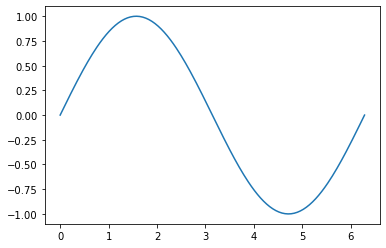

In [9]:
#You do need to remember to run the module above though

# Here is a demonstration of plotting
x_plot = np.linspace(0,2*np.pi,200)
y_plot = np.sin(x_plot)

plt.plot(x_plot,y_plot)

# Matrices and Vectors in `numpy`

When we talk about math, we often think about vectors as being either a column vector,
$x=\begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}$, or a row vector $y = \begin{bmatrix}4 & 5 \end{bmatrix}$. The column vector, in this case, is just a $3\times 1$ matrix while the row vector is just a $1\times 2$ matrix. Matlab follows similar conventions. Every vector is actually either a row vector or column vector. 

Say $M$ is a matrix:

$$
M = \begin{bmatrix} 6 & 7 & 8 \\
-1 & -2 & -3 \end{bmatrix}
$$

Then
$$
Mx = \begin{bmatrix}
44 \\
-14
\end{bmatrix} \quad \textrm{and} \quad
yM = \begin{bmatrix}
19 & 18 & 17
\end{bmatrix}
$$


`numpy` does things a little bit differently:

* A vector can be viewed as just a list of numbers. It is not a row vector or column vector. 
* A matrix can be viewed list of vectors, where each row is a vector. 
* Multiplication of two matrices works like usual. In `numpy`, we would use `A@B` to compute the matrix product between two matrices. (`A*B` gives the entrywise product, like `A.*B` in Matlab.)
* Matrix-vector multiplication works by context: 
    - If `M` is a matrix and `x` is a vector, then `M@x` would treat `x` as a column vector, since that is the only interpretation that leads to a meaningful calculation.
    - If `M` is a matrix and `y` is a vector, then `y@M` would treat `y` as a row vector, since that is the only interpretation that leads to a meaningful calculation.
    - If `x` and `y` are vectors of the same size, then `x@y` calculates their inner product.
    - To do outer products, we need the command `np.outer(x,y)`.

Let's see how this works in the example:

In [ ]:
# Doing vector-matrix multiplication the numpy way

x = np.array([1,2,3])
y = np.array([4,5])

# We create M as a list of lists
M = np.array([[6,7,8],
              [-1,-2,-3]])

# Matrix multiplication uses @, rather than *.
Mx_flat = M@x
yM_flat = y@M

print(Mx_flat)
print(yM_flat)

Notice that they give the currect numbers, but both are displayed in a way that looks like row vectors. Remember that these are not really row or column vectors, but just lists of numbers. 

If we really wanted to, we could explicitly cast the vectors as row or column vectors (i.e. matrices of appropriate shape). Then the matrix multiplications will work out as familiar.

In [ ]:
# Doing vector-matrix multiplication Matlab way

# This is how you make a column vector
x_column = np.array([[1],
                     [2],
                     [3]])

# This is how you make a row vector
y_row = np.array([[4,5]])

# Matrix multiplication uses @, rather than *.
Mx = M@x_column
yM = y_row @M
print(Mx)
print(yM)

Both methods work, and which one makes the most sense depends on what you are doing

# Example Code - Simulating Newton's Laws

Recall from class that Newton's laws can be represented like:
\begin{equation*}
\frac{d}{dt} x(t) = \begin{bmatrix}
0 & 1 \\
0 & 0
\end{bmatrix}x(t) + \begin{bmatrix}
0 \\ 1
\end{bmatrix}u(t)
\end{equation*}
in the case that $m=1$.

Here is how we can simulate this 

Text(0, 0.5, 'Input')

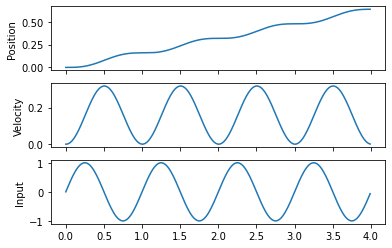

In [10]:
NumSteps = 400
dt = .01
# This creates NumSteps points, spaced by dt
Time = dt * np.arange(NumSteps)

# The reshape is to make each row a vector of length 1. This is important for 
U = np.sin(2*np.pi*Time).reshape((NumSteps,1))

# These are the matrices for 
A = np.array([[0,1],
              [0,0]])
B = np.array([[0],
              [1]])

x = np.zeros(2)
X = []

for i in range(NumSteps):
    X.append(x)
    u = U[i]
    
    x = x + dt*(A@x + B@u)
    
    
X = np.array(X)

Position = X[:,0]
Velocity = X[:,1]

fig,ax = plt.subplots(3,1,sharex=True)
ax[0].plot(Time,Position)
ax[0].set_ylabel('Position')
ax[1].plot(Time,Velocity)
ax[1].set_ylabel('Velocity')
ax[2].plot(Time,U)
ax[2].set_ylabel('Input')


# Coding Question 3

We saw in class that state-space equations for a basic DC motor circuit are given by:

$$
\frac{d}{dt} \begin{bmatrix}
i(t) \\
\theta(t) \\
\omega(t)
\end{bmatrix} = \begin{bmatrix}
    -\frac{R}{L} & 0 & -\frac{K_e}{L} \\
    0 & 0 & 1 \\
    \frac{K_{\tau}}{J} & 0 & -\frac{b}{J}
\end{bmatrix}
\begin{bmatrix}
i(t) \\
\theta(t) \\
\omega(t)
\end{bmatrix}+
\begin{bmatrix}
\frac{1}{L} \\ 0  \\
0
\end{bmatrix}
v(t)
$$
where $i(t)$ is the loop current, $\theta(t)$ is the motor angle, $\omega(t)$ is the motor angular velocity, and $v(t)$ is the input voltage. The parameters are given by $R$ - resistance, $L$ - inductance, $J$ - motor shaft inertia, $b$ - motor shaft damping, $K_e$ - back-emf gain, and $K_{\tau}$ motor gain.

For this problem set
* $R = 10$
* $L = 1$
* $J=2$
* $b=3$
* $K_{\tau}=0.2$
* $K_e = 0.1$

Let $v(t)$ be the exact same input trajectory used in the simulation for Newton's equations. Let $x(t) = \begin{bmatrix} i(t) \\ \theta(t) \\ \omega(t)\end{bmatrix}$, and assume that $x(0)=0$. Plot all of the states and inputs.

Text(0, 0.5, 'Input')

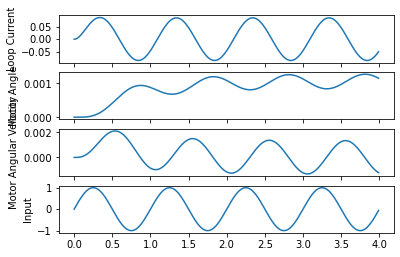

In [14]:
#I'm starting off the code from above

NumSteps = 400
dt = .01
# This creates NumSteps points, spaced by dt
Time = dt * np.arange(NumSteps)

# The reshape is to make each row a vector of length 1. This is important for 
U = np.sin(2*np.pi*Time).reshape((NumSteps,1))

#Don't mind me just declaring some variables
R=10
L=1
J=2
b=3
K_t=0.2
K_e=0.1


# These are the matrices for x(t) and v(t)
#x(t)
A = np.array([[(-R/L),0,(-K_e/L)],
              [0,0,1],
              [(K_t/J),0,-b/J],])
#v(t)
B = np.array([[(1/L)],
              [0],
              [0]])

x = np.zeros(3) #needed to change from 2 to 3, because we have big array of three
X = []

for i in range(NumSteps):
    X.append(x)
    u = U[i]
    
    x = x + dt*(A@x + B@u)
    
    
X = np.array(X)

#Changing the names of these and relabeling them
LoopCurrent = X[:,0]
MotorAngle= X[:,1]
MotorAngularVelocity = X[:,2] 

fig,ax = plt.subplots(4,1,sharex=True) #this should be four, added another line
ax[0].plot(Time,LoopCurrent)
ax[0].set_ylabel('Loop Current')
ax[1].plot(Time, MotorAngle)
ax[1].set_ylabel('Motor Angle')
ax[2].plot(Time, MotorAngularVelocity)
ax[2].set_ylabel('Motor Angular Velocity')
ax[3].plot(Time,U)
ax[3].set_ylabel('Input')

# Gradients

Let $x=\begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix}\in\mathbb{R}^3$ be a vector and let $f$ be a functions so that $f(x)$ is a real number. (Formally, this is denoted as $f:\mathbb{R}^3\to\mathbb{R}$. ) 

The gradient of $f$, denoted by  $\nabla f$ is the vector of partial derivatives:
$$
\nabla f(x) = \begin{bmatrix}
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2} \\
\frac{\partial f(x)}{\partial x_3}
\end{bmatrix}
$$

# Theory Question 1

Let $f(x)$ be the functions given by:

$$
f(x) = \frac{1}{2}\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
+10
$$

Calculate $\nabla f(x)$.

Either write your solution here, or attach a hand-written page.

$$
f(x) = \frac{1}{2}\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
+10
$$

$$
f(x) = \begin{bmatrix} \frac{1}{2}x_1 & \frac{1}{2}x_2 & \frac{1}{2}x_3 \end{bmatrix}
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
+10
$$

$$
f(x) = \begin{bmatrix} \frac{1}{2}x_1 & \frac{1}{2}x_2 & \frac{1}{2}x_3 \end{bmatrix}
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+
x_1*7 + x_2*8 + x_3*9
+10
$$

$$
f(x) =
\begin{bmatrix}
\frac{1}{2}x_1 + \frac{2}{2}x_2 + \frac{3}{2}x_3 & \frac{2}{2}x_1 + \frac{4}{2}x_2 + \frac{5}{2}x_3 & \frac{3}{2}x_1 + \frac{5}{2}x_2 + \frac{6}{2}x_3
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+
7x_1 + 8x_2 + 9x_3
+10
$$

$$
f(x) =
\begin{bmatrix}
\frac{1}{2}x_1 + x_2 + \frac{3}{2}x_3 & x_1 + 2x_2 + \frac{5}{2}x_3 & \frac{3}{2}x_1 + \frac{5}{2}x_2 + 3x_3
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+
7x_1 + 8x_2 + 9x_3
+10
$$

$$
f(x) =
(\frac{1}{2}x_1 + x_2 + \frac{3}{2}x_3)*x_1 + (x_1 + 2x_2 + \frac{5}{2}x_3)*x_2 + (\frac{3}{2}x_1 + \frac{5}{2}x_2 + 3x_3)*x_3
+
7x_1 + 8x_2 + 9x_3
+10
$$

$$
f(x) =
\frac{1}{2}x_1*x_1 + x_2*x_1 + \frac{3}{2}x_3*x_1 + x_1*x_2 + 2x_2*x_2 + \frac{5}{2}x_3*x_2 + \frac{3}{2}x_1*x_3 + \frac{5}{2}x_2*x_3 + 3x_3*x_3
+
7x_1 + 8x_2 + 9x_3
+10
$$

$$
f(x) =
\frac{1}{2}x_1^2 + x_1*x_2 + \frac{3}{2}x_1*x_3 + x_1*x_2 + 2x_2^2 + \frac{5}{2}x_2*x_3 + \frac{3}{2}x_1*x_3 + \frac{5}{2}x_2*x_3 + 3x_3^2
+
7x_1 + 8x_2 + 9x_3
+10
$$

$$
f(x) =
\frac{1}{2}x_1^2 + 2x_2^2 + 3x_3^2 + 2x_1*x_2 + \frac{6}{2}x_1*x_3 + \frac{10}{2}x_2*x_3 
+
7x_1 + 8x_2 + 9x_3
+10
$$

$$
f(x) =
(\frac{1}{2}x_1^2 + 2x_2^2 + 3x_3^2 + 2x_1*x_2 + 3x_1*x_3 + 5x_2*x_3 + 7x_1 + 8x_2 + 9x_3 + 10)
$$

$$
\nabla f(x) = \begin{bmatrix}
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2} \\
\frac{\partial f(x)}{\partial x_3}
\end{bmatrix} = \begin{bmatrix}
\frac{\partial}{\partial x_1}(\frac{1}{2}x_1^2 + 2x_2^2 + 3x_3^2 + 2x_1*x_2 + 3x_1*x_3 + 5x_2*x_3 + 7x_1 + 8x_2 + 9x_3 + 10) \\
\frac{\partial}{\partial x_2}(\frac{1}{2}x_1^2 + 2x_2^2 + 3x_3^2 + 2x_1*x_2 + 3x_1*x_3 + 5x_2*x_3 + 7x_1 + 8x_2 + 9x_3 + 10) \\
\frac{\partial}{\partial x_3}(\frac{1}{2}x_1^2 + 2x_2^2 + 3x_3^2 + 2x_1*x_2 + 3x_1*x_3 + 5x_2*x_3 + 7x_1 + 8x_2 + 9x_3 + 10)
\end{bmatrix}
$$

$$
\nabla f(x) = \begin{bmatrix}
\frac{\partial}{\partial x_1}(\frac{1}{2}x_1^2 + 0 + 0 + 2x_1*x_2 + 3x_1*x_3 + 0 + 7x_1 + 0 + 0 + 0) \\
\frac{\partial}{\partial x_2}(0 + 2x_2^2 + 0 + 2x_1*x_2 + 0 + 5x_2*x_3 + 0 + 8x_2 + 0 + 0) \\
\frac{\partial}{\partial x_3}(0 + 0 + 3x_3^2 + 0 + 3x_1*x_3 + 5x_2*x_3 + 0 + 0 + 9x_3 + 0)
\end{bmatrix}
$$

$$
\nabla f(x) = \begin{bmatrix}
\frac{\partial}{\partial x_1}(\frac{1}{2}x_1^2 + 2x_1*x_2 + 3x_1*x_3 + 7x_1) \\
\frac{\partial}{\partial x_2}(2x_2^2 + 2x_1*x_2 + 5x_2*x_3 + 8x_2) \\
\frac{\partial}{\partial x_3}(3x_3^2 + 3x_1*x_3 + 5x_2*x_3 + 9x_3)
\end{bmatrix}
$$

$$
\nabla f(x) = \begin{bmatrix}
(\frac{2}{2}x_1^1 + 2x_2 + 3x_3 + 7) \\
(2*2x_2 + 2x_1 + 5x_3 + 8) \\
(3*2x_3 + 3x_1 + 5x_2 + 9)
\end{bmatrix}
$$

$$
\nabla f(x) = \begin{bmatrix}
x_1 + 2x_2 + 3x_3 + 7 \\
4x_2 + 2x_1 + 5x_3 + 8 \\
6x_3 + 3x_1 + 5x_2 + 9
\end{bmatrix}
$$

# Calculating Gradients via Taylor's Theorem

Recall Taylor's theorem from calculus. If $f:\mathbb{R}\to \mathbb{R}$

$$
f(x+\delta)=f(x) + f'(x)\delta + r(x,\delta)
$$
where $r(x,\delta)$ is a function that goes to zero faster than linear as $\delta\to 0$. Specifically, we have that $\lim_{\delta\to 0} \frac{r(x,\delta)}{\delta}=0$. 

For example, if 
$$
f(x) = \frac{1}{2} x^2 + x + 1
$$
then a bit of algebra shows that
$$
f(x+\delta) = \underbrace{\left(\frac{1}{2}x^2 + x + 1\right)}_{f(x)} + \underbrace{(x+1)}_{f'(x)}\delta + \underbrace{\frac{1}{2}\delta^2}_{r(x,\delta)}
$$

Taylor's theorem holds in higher dimensions as well. So, if $x\in\mathbb{R}^n$ is a vector and $f:\mathbb{R}^n\to \mathbb{R}$ is a function, we have that 
$$
f(x) + \nabla f(x)^\top \delta + r(x,\delta)
$$
where now the remainder term is a function that goes to zero faster than $\|\delta\|$. (Here $\|\delta\| = \sqrt{\delta^\top \delta} = \sqrt{\sum_{i=1}^n \delta_i^2}$ denotes the *Euclidean norm*.)
Formally, we have that 
$$
\lim_{\delta\to 0} \frac{r(x,\delta)}{\|\delta\|}=0.
$$

In particular, any quadratic terms that arise when expanding $f(x+\delta)$ will be remainder terms. Indeed, consider the case of $n=2$ so we have two-dimensional vectors. Then
\begin{align*}
\frac{\delta_1^2}{\|\delta\|} = \frac{|\delta_1|^2}{\sqrt{|\delta_1|^2+|\delta_2|^2}}
&\le \frac{|\delta_1|^2}{\sqrt{|\delta_1|^2}} = |\delta_1| \to 0
\end{align*}
To see what happens with cross terms, note that
$$
\delta_1 \delta_2 \le \frac{1}{2}\delta_1^2 + \frac{1}{2}\delta_2^2
$$
since 
$$
\frac{1}{2}(\delta_1-\delta_2)^2 = \frac{1}{2}\delta_1^2 + \frac{1}{2}\delta_2^2 - \delta_1 \delta _2\ge 0.
$$
So, the argument above shows that
$$
\frac{\delta_1\delta_2}{\|\delta\|}\le \frac{1}{2}|\delta_1|+\frac{1}{2}|\delta_2|\to 0.
$$

## Take-away message

If we have a function $f(x)$ and we can expand it of the form
$$
f(x+\delta)=f(x) + g(x)^\top \delta + r(x,\delta)
$$
where $r(x,\delta)$ consists of quadratics (or higher-order terms) in $\delta$, then the linear part, $g(x)$, must actually be the gradient!

In many cases, it is much easier to just do this expansion and find the linear terms. 

# Theory Question 2

The original function from the previous question can be expressed as
$$
f(x) = \frac{1}{2}x^\top P x + x^\top q + r,
$$
where $P$ is a symmetric matrix, so that $P=P^\top$.

Calculate the expansion of $f(x+\delta)$ to get a general expression for $\nabla f(x)$. 

Hints:
* The transpose of matrix products works as follows $(AB)^\top = B^\top A^\top$ and $(ABC)^\top = C^\top B^\top A^\top$
* The transpose of a scalar is always itself. So $x^\top q = (x^\top q)^\top = q^\top x$ and $x^\top P \delta=(x^\top P \delta)^\top = \delta^\top P^\top x = \delta^\top P x$, where the last equality is because $P = P^\top$. 
* Remember that matrix multiplication does not commute! Order matters in all of your calculations. In other words $AB\ne BA$ (aside from some special cases). In particular, $x^\top Px\ne Px^\top x$ and $x^\top q \ne q x^\top$!
* Your expression for the gradient should match up exactly with what you got from the previous question. If it does not, something went wrong. 

Either write your solution here, or attach a hand-written page. 

The original function from the previous question can be expressed as
$$
f(x) = \frac{1}{2}x^\top P x + x^\top q + r,
$$

$$
f(x) = \frac{1}{2}\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
+\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
+10
$$

$$
x^\top = \begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
$$
$$
P = \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}
$$
$$
x = \begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
$$
$$
q = \begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
$$
$$
r = 10
$$




$$
f(x) = \frac{1}{2}x^\top P x + x^\top q + r
$$

$$
f(x+\delta) = \underbrace{\left(\frac{1}{2}x^\top P x + x^\top q + r\right)}_{f(x)} + \underbrace{(f'(x))}_{f'(x)}\delta + \underbrace{\frac{1}{2}\delta^2}_{r(x,\delta)}
$$

$$
f(x+\delta) = f(x) + \nabla f(x)^\top \delta + r(x,\delta)
$$

Using the common matrix derivatives table found here http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf

$$
f'(x) = \frac{2}{2}P x + q + 0
$$

$$
f'(x) = P x + q
$$

$$
f(x+\delta) = \underbrace{\left(\frac{1}{2}x^\top P x + x^\top q + r\right)}_{f(x)} + \underbrace{(P x + q)}_{f'(x)}\delta + \underbrace{\frac{1}{2}\delta^2}_{r(x,\delta)}
$$

$$
\nabla f(x)^\top = P x + q
$$

$$
\nabla f(x) = (\nabla f(x)^\top)^\top = (P x + q)^\top
$$

$$
\nabla f(x) = (P x + q)^\top
$$

$$
\nabla f(x) = P x^\top + q
$$

$$
\nabla f(x) = \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6
\end{bmatrix}\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix} + \begin{bmatrix}
7 \\
8 \\
9
\end{bmatrix}
$$

$$
\nabla f(x) = \begin{bmatrix}
x_1 + 2x_2 + 3x_3 + 7 \\
2x_1 + 4x_2 + 5x_3 + 8 \\
3x_1 + 5x_2 + 6x_3 + 9
\end{bmatrix}
 = \begin{bmatrix}
x_1 + 2x_2 + 3x_3 + 7 \\
4x_2 + 2x_1 + 5x_3 + 8 \\
6x_3 + 3x_1 + 5x_2 + 9
\end{bmatrix}
$$